In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Watford,Middlesbrough,1-0,https://www.besoccer.com/match/watford-fc/midd...,2021,1,championship
1,Birmingham City,Brentford,1-0,https://www.besoccer.com/match/birmingham-city...,2021,1,championship
2,Wycombe Wanderers,Rotherham United,0-1,https://www.besoccer.com/match/wycombe-wandere...,2021,1,championship
3,AFC Bournemouth,Blackburn Rovers,3-2,https://www.besoccer.com/match/afc-bournemouth...,2021,1,championship
4,Barnsley,Luton Town,0-1,https://www.besoccer.com/match/barnsley-fc/lut...,2021,1,championship


## Data Exploration

In [2]:
# Number of seasons in each league
df.groupby('League')['Season'].nunique()

League
2_liga              32
bundesliga          32
championship        17
eerste_divisie      20
eredivisie          32
ligue_1             32
ligue_2             28
premier_league      32
primeira_liga       32
primera_division    32
segunda_division    32
segunda_liga        24
serie_a             27
serie_b             32
Name: Season, dtype: int64

In [3]:
# Total number of teams
len(set(df['Home_Team'].unique().tolist() + df['Away_Team'].unique().tolist()))

548

In [4]:
df['Result'].unique()

array(['1-0', '0-1', '3-2', '2-1', '0-2', '0-0', '2-0', '5-0', '3-0',
       '1-1', '2-2', '1-2', '0-4', '1-3', '2-4', '3-1', '0-3', '4-2',
       '4-3', '2-3', '4-0', '4-1', '1-4', '3-3', '7-2', '6-0', '7-0',
       '0-5', '5-2', '5-1', '7-1', '2-5', '6-1', '5-4', '5-3', '4-4',
       '3-4', '6-4', '1-5', '1-6', '6-3', '3-5', '3-6', '6-2', '5-5',
       '4-6', '2-6', '0-7', '0-6', '6-5', '4-7', '2-7', '1-7', '10-0',
       '1-8', '8-0', '8-1', '1 (0-0) 1', '4-5', '18 MAR', '0-9', '9-0',
       '6-6', '7-4', '7-3', '7-6', '8-2', '3-7', '2-8', '9-2', '1-9',
       '9-1', '0-8', '3-8', '10-2', '5-6', '17 JAN', '0-13', '0 (0-0) 0',
       '3 (3-2) 2', '0 (0-1) 1'], dtype=object)

### Parse

In [9]:
# Remove dates in results
df.drop(df[df['Result'].str.contains('JAN')].index, inplace=True)
df.drop(df[df['Result'].str.contains('MAR')].index, inplace=True)

# Remove brackets and everything before and after.
df['Result'] = df['Result'].str.replace('\d\s\(', '').str.replace('\)\s\d', '')

df['Home_Score'] = df['Result'].apply(lambda x: int(x.split('-')[0]))
df['Away_Score'] = df['Result'].apply(lambda x: int(x.split('-')[1]))

#### Match outcome
| Result | Value |
| ------ | ----- |
| Home wins/Away loses | 0 |
| Home loses/Away wins | 1 |
| Draw | 2 |

In [10]:
df['Result'] = df.apply(lambda x: 0 if x['Home_Score'] > x['Away_Score'] else 1 if x['Home_Score'] < x['Away_Score'] else 2, axis=1)

### Exploration continued

In [6]:
df[['Home_Score', 'Away_Score']].describe()

,Home_Score,Away_Score
count,146496.000000,146496.000000
mean,1.500778,1.067490
std,1.260938,1.081964
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,13.000000


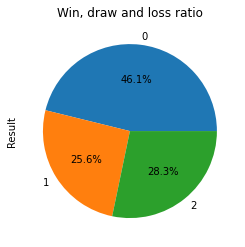

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pie chart of wins, draws and losses
df.groupby('Result')['Result'].count().plot(kind='pie', autopct='%1.1f%%', title='Win, draw and loss ratio')

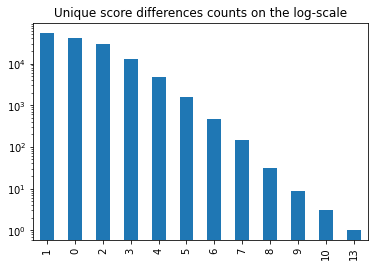

In [22]:
df['Diff'] = (df['Home_Score'] - df['Away_Score']).abs()
df['Diff'].value_counts().plot(kind='bar', logy=True, title='Unique score differences counts on the log-scale')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


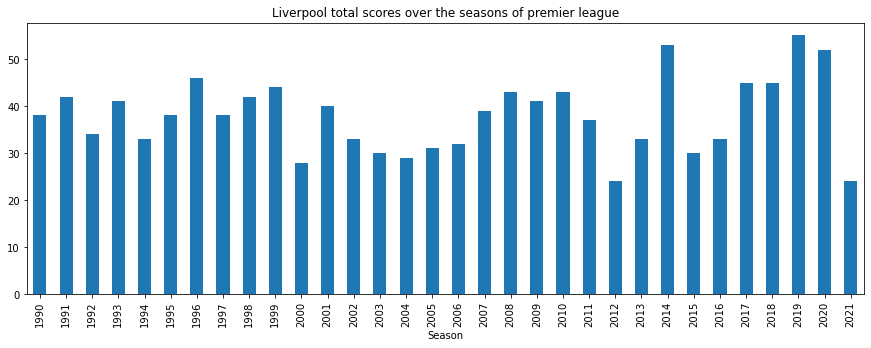

In [15]:
team = 'Liverpool'
plt.figure(figsize=(15,5))
df[df['League'] == 'premier_league'][df['Home_Team'] == team].groupby('Season')['Home_Score'].sum().plot(kind='bar', title='Liverpool total scores over the seasons of premier league')
plt.show()